In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml


In [15]:
dirs = [
    "logs/minimal/version_23",  
    "logs/minimal/version_24",  
]
# dirs = [
#     "logs/minimal/version_53",  
#     "logs/minimal/version_54",  
# ]
results = {}
for d in dirs:
    with open(f"{d}/hparams.yaml", "r") as io:
        cfg = yaml.safe_load(io)
    df = pd.read_csv(f"{d}/esrf.csv")
    seed = cfg['seed']
    method = "targeted" if cfg["targeted"] else "untargeted"
    results[method] = df

# concat all results
truth = results["untargeted"][["delta", "truth"]]  # same for same seed


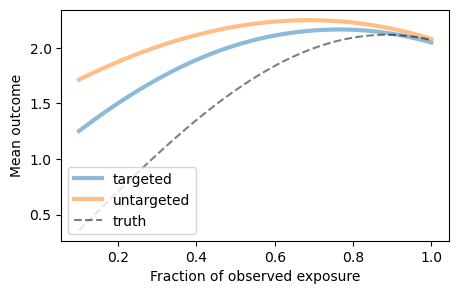

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))

for m in ("targeted", "untargeted"):
    D = results[m]
    ax.plot(D.delta, D.estim, alpha=0.5, label=m, lw=3)

# add truth
ax.plot(truth.delta, truth.truth, c="black", alpha=0.5, ls="--", label="truth")
ax.legend(loc="lower left")
ax.set_xlabel("Fraction of observed exposure")
ax.set_ylabel("Mean outcome")
plt.savefig(f"logs/minimal/plot_{seed}.pdf", bbox_inches="tight")
